<center><h1>Slip 1 </h1></center>
<hr>

<h1><b>Amazon Dataset Analysis (credits.csv & titles.csv)</b></h1>
    <h2><b>Question 1</b></h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following operations on it. 
        Display the results in an appropriate format wherever required.
    </p>
    <ol>
        <li><b>Load the data and describe the dataset details.</b></li>
        <li><b>Check the nature of data and determine if scaling is required.</b></li>
        <li><b>Check for missing values and show the percentage of missing values for each attribute. 
            Handle the missing values based on percentage. Which attributes are not useful? Remove them.</b></li>
    </ol>



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data and describe the dataset details
titles = pd.read_csv('titles.csv')
credits = pd.read_csv('credits.csv')

print("Titles Dataset Description:")
print(titles.describe(include='all'))
print("\nCredits Dataset Description:")
print(credits.describe(include='all'))

Titles Dataset Description:
             id      title   type         description  release_year  \
count      9871       9871   9871                9752   9871.000000   
unique     9868       9737      2                9734           NaN   
top     tm66674  King Lear  MOVIE  No overview found.           NaN   
freq          2          3   8514                   5           NaN   
mean        NaN        NaN    NaN                 NaN   2001.327221   
std         NaN        NaN    NaN                 NaN     25.810071   
min         NaN        NaN    NaN                 NaN   1912.000000   
25%         NaN        NaN    NaN                 NaN   1995.500000   
50%         NaN        NaN    NaN                 NaN   2014.000000   
75%         NaN        NaN    NaN                 NaN   2018.000000   
max         NaN        NaN    NaN                 NaN   2022.000000   

       age_certification      runtime     genres production_countries  \
count               3384  9871.000000       98


Titles Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtyp

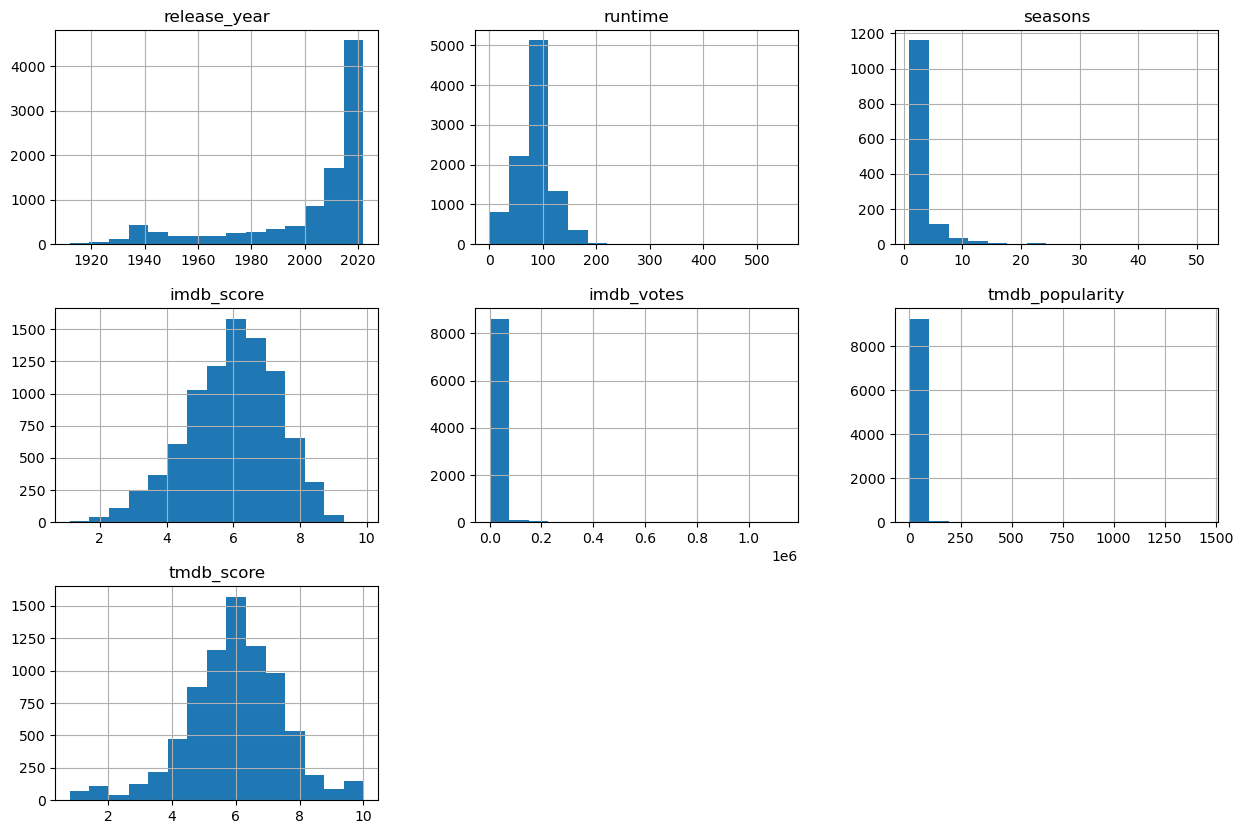

In [2]:
# 2. Check the nature of data and check if scaling is required
print("\nTitles Dataset Info:")
print(titles.info())
print("\nCredits Dataset Info:")
print(credits.info())

# Scaling check
# Check for numeric columns in titles
numeric_columns_titles = titles.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric columns in titles dataset: ", numeric_columns_titles)

# Check for numeric columns in credits
numeric_columns_credits = credits.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric columns in credits dataset: ", numeric_columns_credits)

# Plotting histograms to check the distribution
titles[numeric_columns_titles].hist(bins=15, figsize=(15, 10))
plt.show()

In [3]:
# 3. Check for missing values and show the percentage of missing values for each attribute
missing_values_titles = titles.isnull().mean() * 100
print("\nPercentage of missing values in titles dataset:\n", missing_values_titles)

missing_values_credits = credits.isnull().mean() * 100
print("\nPercentage of missing values in credits dataset:\n", missing_values_credits)



Percentage of missing values in titles dataset:
 id                       0.000000
title                    0.000000
type                     0.000000
description              1.205552
release_year             0.000000
age_certification       65.717759
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 86.252659
imdb_id                  6.757167
imdb_score              10.343430
imdb_votes              10.444737
tmdb_popularity          5.541485
tmdb_score              21.092088
dtype: float64

Percentage of missing values in credits dataset:
 person_id     0.000000
id            0.000000
name          0.000000
character    13.109832
role          0.000000
dtype: float64


In [4]:
# Handle missing values based on percentage
# Let's assume we drop columns with more than 50% missing values for this example
threshold = 50.0

# Titles dataset
columns_to_drop_titles = missing_values_titles[missing_values_titles > threshold].index
titles_cleaned = titles.drop(columns=columns_to_drop_titles)

# Credits dataset
columns_to_drop_credits = missing_values_credits[missing_values_credits > threshold].index
credits_cleaned = credits.drop(columns=columns_to_drop_credits)

print("\nColumns dropped from titles dataset:\n", columns_to_drop_titles)
print("\nColumns dropped from credits dataset:\n", columns_to_drop_credits)


Columns dropped from titles dataset:
 Index(['age_certification', 'seasons'], dtype='object')

Columns dropped from credits dataset:
 Index([], dtype='object')


In [5]:
titles_cleaned.dropna(subset=['id', 'title'], inplace=True)

credits_cleaned.dropna(subset=['person_id', 'id'], inplace=True)

In [6]:
# Display cleaned datasets
print("\nCleaned Titles Dataset:\n")
print(titles_cleaned.info())
print("\n", titles_cleaned.head())

print("\nCleaned Credits Dataset:\n")
print(credits_cleaned.info())
print("\n", credits_cleaned.head())


Cleaned Titles Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   runtime               9871 non-null   int64  
 6   genres                9871 non-null   object 
 7   production_countries  9871 non-null   object 
 8   imdb_id               9204 non-null   object 
 9   imdb_score            8850 non-null   float64
 10  imdb_votes            8840 non-null   float64
 11  tmdb_popularity       9324 non-null   float64
 12  tmdb_score            7789 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1002.7+ KB
None

         id                    

In [7]:
# we will assume that attributes with high cardinality or less variability might be less useful.
# Also, description might be dropped as it is text-heavy for some analyses.
columns_to_drop_titles = ['description']
titles_cleaned = titles_cleaned.drop(columns=columns_to_drop_titles)

print("\nFinal Titles Dataset after removing non-useful attributes:\n")
print(titles_cleaned.info())
print("\n", titles_cleaned.head())



Final Titles Dataset after removing non-useful attributes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   release_year          9871 non-null   int64  
 4   runtime               9871 non-null   int64  
 5   genres                9871 non-null   object 
 6   production_countries  9871 non-null   object 
 7   imdb_id               9204 non-null   object 
 8   imdb_score            8850 non-null   float64
 9   imdb_votes            8840 non-null   float64
 10  tmdb_popularity       9324 non-null   float64
 11  tmdb_score            7789 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 925.5+ KB
None

         id                        title   type 

In [8]:
# Update numeric columns after dropping
numeric_columns_titles = titles_cleaned.select_dtypes(include=['int64', 'float64']).columns
numeric_columns_credits = credits_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Check if scaling is required by examining the numeric columns' ranges
print("\nNumeric columns in titles dataset summary statistics:\n")
print(titles_cleaned[numeric_columns_titles].describe())

print("\nNumeric columns in credits dataset summary statistics:\n")
print(credits_cleaned[numeric_columns_credits].describe())



Numeric columns in titles dataset summary statistics:

       release_year      runtime   imdb_score    imdb_votes  tmdb_popularity  \
count   9871.000000  9871.000000  8850.000000  8.840000e+03      9324.000000   
mean    2001.327221    85.973052     5.976395  8.533614e+03         6.910204   
std       25.810071    33.512466     1.343842  4.592015e+04        30.004098   
min     1912.000000     1.000000     1.100000  5.000000e+00         0.000011   
25%     1995.500000    65.000000     5.100000  1.170000e+02         1.232000   
50%     2014.000000    89.000000     6.100000  4.625000e+02         2.536000   
75%     2018.000000   102.000000     6.900000  2.236250e+03         5.634000   
max     2022.000000   549.000000     9.900000  1.133692e+06      1437.906000   

        tmdb_score  
count  7789.000000  
mean      5.984247  
std       1.517986  
min       0.800000  
25%       5.100000  
50%       6.000000  
75%       6.900000  
max      10.000000  

Numeric columns in credits datase

In [9]:
# Recommendations on scaling
print("\nRecommendations on Scaling:")
for column in numeric_columns_titles:
    if titles_cleaned[column].std() > titles_cleaned[column].mean() * 0.1:  # Example heuristic
        print(f"- Column '{column}' in titles dataset may benefit from scaling.")

for column in numeric_columns_credits:
    if credits_cleaned[column].std() > credits_cleaned[column].mean() * 0.1:  # Example heuristic
        print(f"- Column '{column}' in credits dataset may benefit from scaling.")


Recommendations on Scaling:
- Column 'runtime' in titles dataset may benefit from scaling.
- Column 'imdb_score' in titles dataset may benefit from scaling.
- Column 'imdb_votes' in titles dataset may benefit from scaling.
- Column 'tmdb_popularity' in titles dataset may benefit from scaling.
- Column 'tmdb_score' in titles dataset may benefit from scaling.
- Column 'person_id' in credits dataset may benefit from scaling.


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_columns_titles = ['release_year', 'runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
numeric_columns_credits = ['person_id']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the numeric columns in titles_cleaned
titles_cleaned[numeric_columns_titles] = scaler.fit_transform(titles_cleaned[numeric_columns_titles])

# Apply scaling to the numeric columns in credits_cleaned
credits_cleaned[numeric_columns_credits] = scaler.fit_transform(credits_cleaned[numeric_columns_credits])

# Display the scaled data
print("Scaled Titles Dataset:\n", titles_cleaned[numeric_columns_titles].head())
print("\nScaled Credits Dataset:\n", credits_cleaned[numeric_columns_credits].head())


Scaled Titles Dataset:
    release_year   runtime  imdb_score  imdb_votes  tmdb_popularity  tmdb_score
0     -2.608696 -1.998553    1.952427   -0.162065         0.283770    1.064474
1     -2.918668 -0.237925    1.654756    1.769092         0.057888    1.327998
2     -2.143738  2.537302    1.580338    1.186744         0.050822    1.196236
3     -2.376217  0.179851    1.357085    1.073694         0.145314    0.932712
4     -1.988752  0.239533    1.431503    0.487621         0.045423    1.064474

Scaled Credits Dataset:
    person_id
0  -0.617977
1  -0.667727
2  -0.667725
3  -0.686041
4  -0.672618


<hr>


<body>
    <h1><b>Breast Cancer Data Analysis</b></h1>
    <h2><b>Question 2</b></h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following operations on it. 
        Display the results in an appropriate format wherever required.
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>Construct a predictive model using Random Forest for classification of tumors into malignant (cancerous) or benign (non-cancerous) by choosing appropriate criteria. 
            Analyze the performance of the model with suitable evaluation measures.</b></li>
        <li><b>Display the classification report.</b></li>
    </ol>
</body>


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data and perform basic EDA
# Load the dataset
df = pd.read_csv('Breast Cancer Data.csv')

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_w

In [12]:
# Summary statistics and info about the dataset
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064  

In [13]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


Accuracy Score: 0.9708


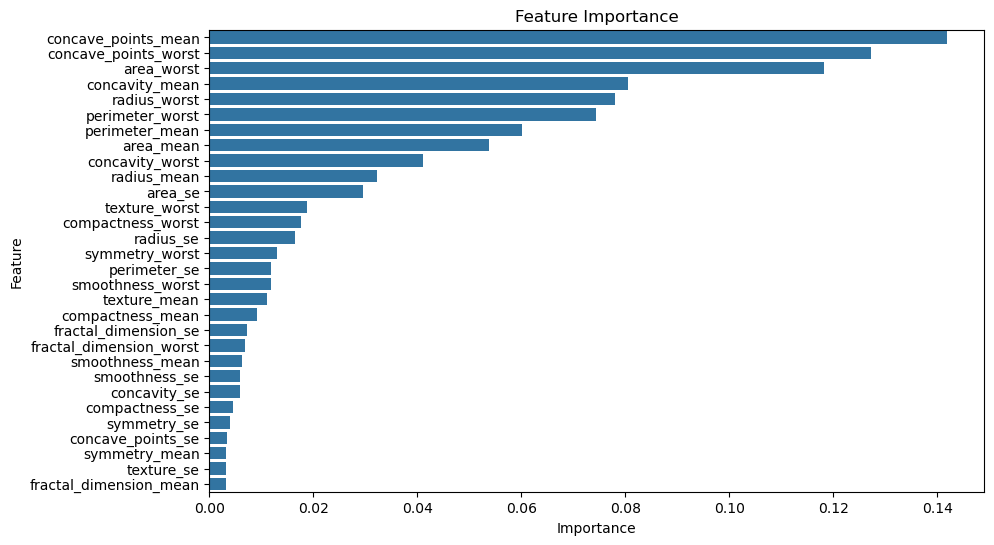

In [14]:
# Step 2: Select appropriate features by performing feature engineering
# Remove the 'id' column as it doesn't provide any valuable information for the model
df = df.drop(columns=['id'])

# Encode the diagnosis column (M = malignant, B = benign)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])  # M -> 1, B -> 0

# Selecting relevant features for classification (all columns except 'diagnosis')
X = df.drop(columns=['diagnosis'])

# Target variable (diagnosis)
y = df['diagnosis']

# Step 3: Construct a predictive model using Random Forest
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Step 4: Evaluate the model's performance
# Make predictions
y_pred = rf_model.predict(X_test)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

# Feature importance visualization
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance")
plt.show()

<hr>

<center><h1>Slip 2 </h1></center>
<hr>

<h1><b>Hotel Booking Data Analysis</b></h1>
    <h2><b>Question 1</b></h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following operations on it. 
        Display the results in an appropriate format wherever required.
    </p>
    <ol>
        <li><b>Load the data and describe the dataset details.</b></li>
        <li><b>Check for missing and null values and correct them if any. Find out features which are not relevant and remove them. Identify continuous and categorical variables.</b></li>
        <li><b>Find out cancellation percentage in hotels and plot a pie chart for it.</b></li>
        <li><b>Which is the month with maximum and minimum bookings?</b></li>
    </ol>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  me

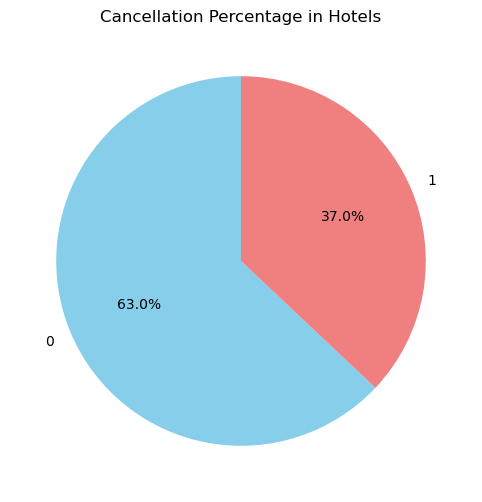


Bookings per Month:
arrival_date_month
January       5929
February      8068
March         9794
April        11089
May          11791
June         10939
July         12661
August       13877
September    10508
October      11160
November      6794
December      6780
Name: count, dtype: int64

Month with Maximum Bookings: August (13877 bookings)
Month with Minimum Bookings: January (5929 bookings)


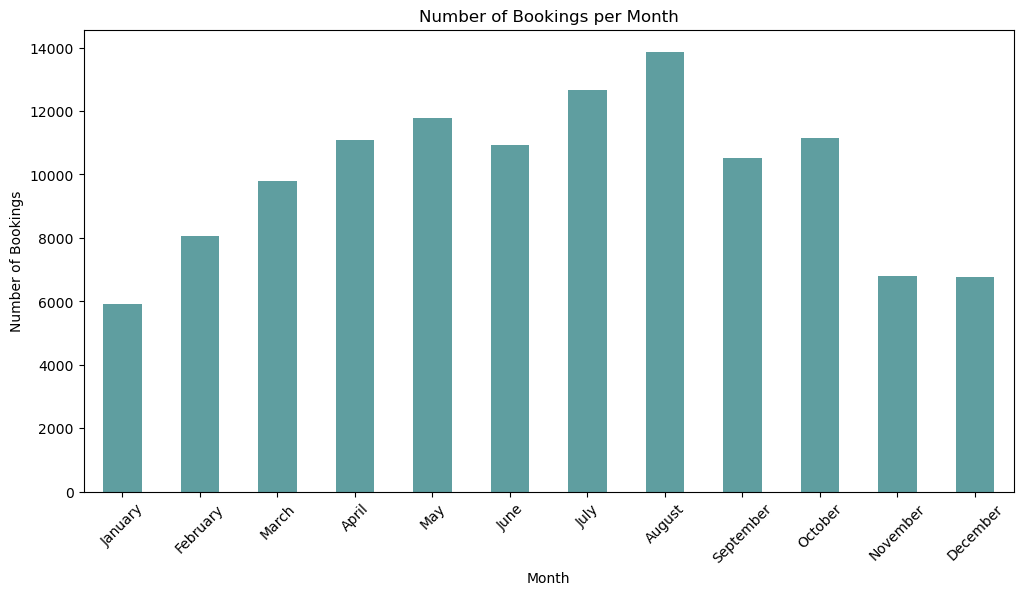

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data and describe the dataset details
file_path = 'hotel_bookings.csv'  # replace with your dataset path
data = pd.read_csv(file_path)

# Describe the dataset
print("Dataset Info:")
data.info()
print("\nDataset Description:")
print(data.describe(include='all'))

# 2. Check for missing and null values and correct them if any
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Fill missing values or drop columns with too many missing values
# Assuming we are filling missing numerical values with the mean and categorical with the mode
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'object':
            data.loc[:, column] = data[column].fillna(data[column].mode()[0])
        else:
            data.loc[:, column] = data[column].fillna(data[column].mean())

print("\nMissing values after correction:")
print(data.isnull().sum())

# Remove irrelevant features
# Assuming 'agent' and 'company' are irrelevant for our analysis
data.drop(['agent', 'company'], axis=1, inplace=True)

# Identify continuous and categorical variables
categorical_vars = data.select_dtypes(include=['object']).columns
continuous_vars = data.select_dtypes(include=[np.number]).columns

print("\nCategorical Variables:")
print(categorical_vars)
print("\nContinuous Variables:")
print(continuous_vars)

# 3. Find out cancellation percentage in hotels and plot a pie chart for it
cancellations = data['is_canceled'].value_counts(normalize=True) * 100
print("\nCancellation Percentage:")
print(cancellations)

# Plotting the pie chart for cancellations
plt.figure(figsize=(8, 6))
cancellations.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Cancellation Percentage in Hotels')
plt.ylabel('')
plt.show()

# 4. Identify the month with maximum and minimum bookings
# Convert arrival_date_month to a categorical type with ordered categories
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories=months, ordered=True)

# Count the number of bookings per month
bookings_per_month = data['arrival_date_month'].value_counts().sort_index()

print("\nBookings per Month:")
print(bookings_per_month)

max_bookings_month = bookings_per_month.idxmax()
min_bookings_month = bookings_per_month.idxmin()

print(f"\nMonth with Maximum Bookings: {max_bookings_month} ({bookings_per_month.max()} bookings)")
print(f"Month with Minimum Bookings: {min_bookings_month} ({bookings_per_month.min()} bookings)")

# Plotting bookings per month
plt.figure(figsize=(12, 6))
bookings_per_month.plot(kind='bar', color='cadetblue')
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


<hr>

<h1><b>Telecom Churn Data Analysis</b></h1>
    <h2><b>Question 2</b></h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following operations on it. 
        Display the results in an appropriate format wherever required.
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>Construct a predictive model using Decision Tree to predict whether a customer will churn or not. 
            Analyze the performance of the model with suitable evaluation measures.</b></li>
        <li><b>Display the classification report.</b></li>
    </ol>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the data
data = pd.read_csv('Telco-Customer-Churn.csv') 

# Perform basic EDA
print("Basic Information:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Feature Engineering
# Drop customerID as it is not useful for prediction
data = data.drop('customerID', axis=1)

# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)

# Split the data into features and target variable
X = data.drop('Churn_Yes', axis=1)  # Features
y = data['Churn_Yes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construct a predictive model using decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Analyze the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy of the model: {:.2f}%".format(accuracy * 100))
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

<hr>

<center><h1>Slip 3 </h1></center>
<hr>

<h1><b>Heart Disease Data Analysis</b></h1>
    <h2><b>Question 1</b></h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following operations on it. 
        Display the results in an appropriate format wherever required.
    </p>
    <ol>
        <li><b>Load the data and describe the dataset details.</b></li>
        <li><b>Check the nature of data and do appropriate conversion if required.</b></li>
        <li><b>Display count of missing and null values and replace them if any. Find out features which are not relevant and remove them.</b></li>
        <li><b>Which features are highly related with heart disease?</b></li>
        <li><b>What is the relation between GenHealth and HeartDisease?</b></li>
    </ol>

Dataset Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  Kid

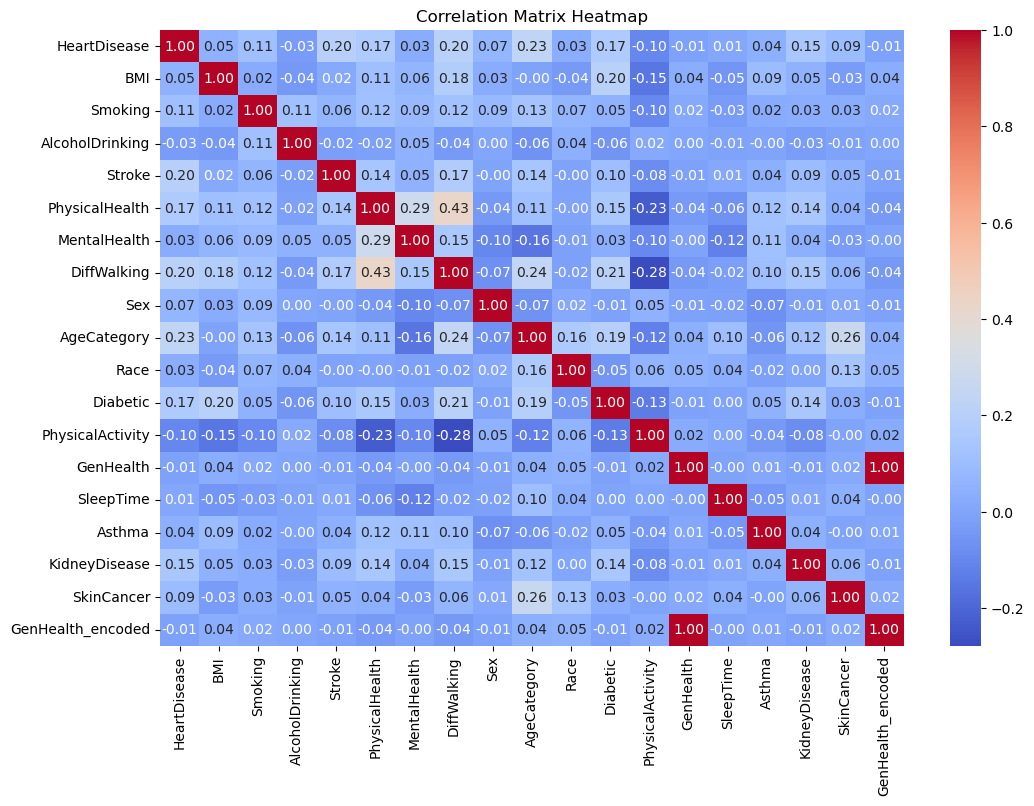


Features highly related with Heart Disease:
HeartDisease         1.000000
AgeCategory          0.233432
DiffWalking          0.201258
Stroke               0.196835
PhysicalHealth       0.170721
Diabetic             0.168553
KidneyDisease        0.145197
Smoking              0.107764
SkinCancer           0.093317
Sex                  0.070040
BMI                  0.051803
Asthma               0.041444
Race                 0.034854
MentalHealth         0.028591
SleepTime            0.008327
GenHealth           -0.011062
GenHealth_encoded   -0.011062
AlcoholDrinking     -0.032080
PhysicalActivity    -0.100030
Name: HeartDisease, dtype: float64

Relation between GenHealth and HeartDisease:
GenHealth
0    0.022441
1    0.204285
2    0.102632
3    0.341040
4    0.047261
Name: HeartDisease, dtype: float64


C:\Users\Harsh Jagtap\AppData\Local\Temp\ipykernel_18064\3986761531.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genhealth_heartdisease_relation.index, y=genhealth_heartdisease_relation.values, palette='viridis')


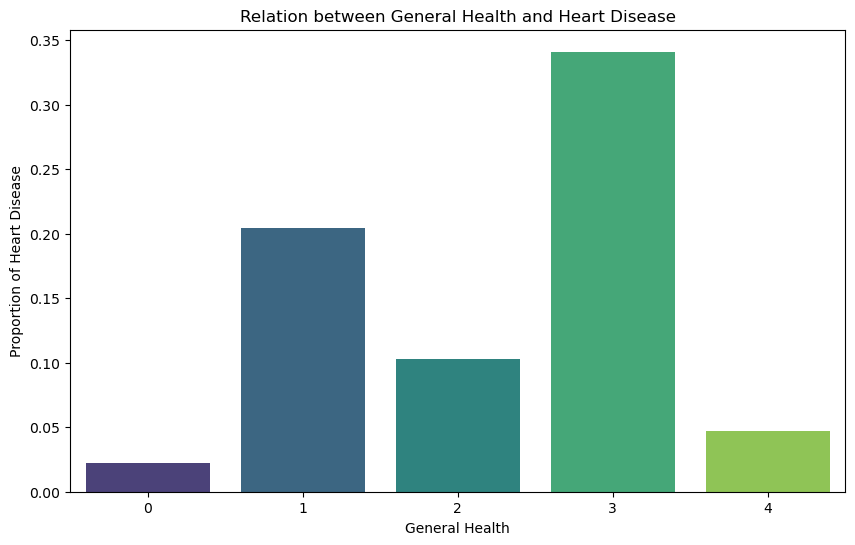

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 1. Load the data and describe the dataset details
data = pd.read_csv('heart_disease_data.csv')
print("Dataset Details:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# 2. Check the nature of data and do appropriate conversion if required
# Checking for categorical data
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_cols)

# Display the mapping of labels to encoded values
encoder = LabelEncoder()
data['GenHealth_encoded'] = encoder.fit_transform(data['GenHealth'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

# Convert categorical columns to numerical using label encoding (if needed)
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
    

# 3. Display count of missing and null values and replace them if any
print("\nMissing and Null Values Count:")
missing_values = data.isnull().sum()
print(missing_values)

# Replace missing values (example: using mean for numerical columns and mode for categorical columns)
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype.name == 'category':
        data[col] = data[col].fillna(data[col].mode()[0])  # Fill with mode for categorical data
    else:
        data[col] = data[col].fillna(data[col].mean())  # Fill with mean for numerical data

print("\nMissing values after replacement:")
print(data.isnull().sum())

# Removing irrelevant features (example: removing a column named 'ID' if it exists)
if 'ID' in data.columns:
    data = data.drop(columns=['ID'])

# 4. Which features are highly related with heart disease?
# Using correlation matrix (only for numerical columns)
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Display heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Assuming 'HeartDisease' is the target column, checking its correlation with other features
heart_disease_correlation = correlation_matrix['HeartDisease'].sort_values(ascending=False)
print("\nFeatures highly related with Heart Disease:")
print(heart_disease_correlation)

# 5. What is the relation between GenHealth and HeartDisease?
# Assuming 'GenHealth' is a categorical column describing general health
# If GenHealth is categorical, use value counts or mean proportions
if 'GenHealth' in data.columns:
    genhealth_heartdisease_relation = data.groupby('GenHealth')['HeartDisease'].mean()
    print("\nRelation between GenHealth and HeartDisease:")
    print(genhealth_heartdisease_relation)

    # Visualizing the relation
    plt.figure(figsize=(10, 6))
    sns.barplot(x=genhealth_heartdisease_relation.index, y=genhealth_heartdisease_relation.values, palette='viridis')
    plt.title('Relation between General Health and Heart Disease')
    plt.xlabel('General Health')
    plt.ylabel('Proportion of Heart Disease')
    plt.show()

<hr>

<h1><b>Diabetes Data Analysis</b></h1>
    <h2><b>Question 2</b></h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following operations on it. 
        Display the results in an appropriate format wherever required.
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>Construct a predictive model using SVM for classification of diabetes by choosing appropriate criteria. 
            Analyze the performance of the model with suitable evaluation measures.</b></li>
        <li><b>Display the classification report.</b></li>
    </ol>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

   Glucose  BloodPressure  Insulin  DiabetesPedigreeFunction  Age  Outcome
0      148             72        0                     0.627   50        1
1       85             66        0                     0.351   31        0
2      183             64        0                     0.672   32        1
3       89             66       94                     0.167   21        0
4      137             40      168                     2.288   33        1
          Glucose  BloodPressure     Insulin  DiabetesPedigreeFunction  \
count  768.000000     768.000000  768.000000                768.000000   
mean   120.894531      69.105469   79.799479                  0.471876   
std     31.972618      19.355807  115.244002                  0.331329   
min      0.000000       0.000000    0.000000                  0.078000   
25%     99.000000      62.000000    0.000000                  0.243750   
50%    117.000000      72.000000   30.500000                  0.372500   
75%    140.250000      80.000000

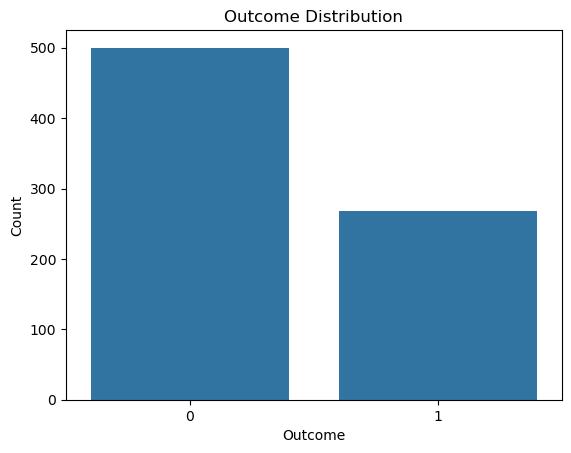

In [19]:
# Step 1: Load the data and perform basic EDA
data = pd.read_csv('diabetes.csv')
print(data.head())
print(data.describe())
print(data.isnull().sum())

sns.countplot(x='Outcome', data=data)
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [20]:
# step 2 Feature engineering
# Check for zero values in columns that shouldn't have them
columns_with_zero_values = ['Glucose', 'BloodPressure', 'Insulin']
print((data[columns_with_zero_values] == 0).sum())

# Replace zero values with the median of the column
for column in columns_with_zero_values:
    data[column] = data[column].replace(0, data[column].median())

# Display the updated statistics
print(data.describe())

Glucose            5
BloodPressure     35
Insulin          374
dtype: int64
          Glucose  BloodPressure     Insulin  DiabetesPedigreeFunction  \
count  768.000000     768.000000  768.000000                768.000000   
mean   121.656250      72.386719   94.652344                  0.471876   
std     30.438286      12.096642  105.547598                  0.331329   
min     44.000000      24.000000   14.000000                  0.078000   
25%     99.750000      64.000000   30.500000                  0.243750   
50%    117.000000      72.000000   31.250000                  0.372500   
75%    140.250000      80.000000  127.250000                  0.626250   
max    199.000000     122.000000  846.000000                  2.420000   

              Age     Outcome  
count  768.000000  768.000000  
mean    33.240885    0.348958  
std     11.760232    0.476951  
min     21.000000    0.000000  
25%     24.000000    0.000000  
50%     29.000000    0.000000  
75%     41.000000    1.000000  
m

In [21]:
# Define features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construct the SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [22]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[84 15]
 [24 31]]
Accuracy Score: 0.7467532467532467
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        99
           1       0.67      0.56      0.61        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



<hr>

<center><h1>Slip 4 </h1></center>
<hr>

<h1><b>Diabetes Data Analysis</b></h1>
    <h2><b>Question 1</b></h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following operations on it. 
        Display the results in an appropriate format wherever required.
    </p>
    <ol>
        <li><b>Load the data and describe the dataset details.</b></li>
        <li><b>Check the nature of data and do appropriate conversion if required.</b></li>
        <li><b>Display count of missing and null values and replace them if any. 
            Find out features which are not relevant and remove them.</b></li>
        <li><b>Which features are highly related with diabetes?</b></li>
        <li><b>Plot the important features which affect diabetes using proper graphs.</b></li>
    </ol>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('diabetes.csv')


In [24]:
# 1. Describe the dataset details
print("Dataset Details:")
print(data.info())
print("\nStatistical Summary:")
print(data.describe())

Dataset Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Age                       768 non-null    int64  
 5   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 36.1 KB
None

Statistical Summary:
          Glucose  BloodPressure     Insulin  DiabetesPedigreeFunction  \
count  768.000000     768.000000  768.000000                768.000000   
mean   120.894531      69.105469   79.799479                  0.471876   
std     31.972618      19.355807  115.244002                  0.331329   
min      0.000000       0.000000    0.000000                  0.0

In [25]:
# 2. Check the nature of data and do appropriate conversion if required
# Check data types
print("\nData Types:")
print(data.dtypes)

# There are no categorical data columns that need conversion; all are numerical.


Data Types:
Glucose                       int64
BloodPressure                 int64
Insulin                       int64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [26]:
# 3. Display count of missing and null values and replace them if any
print("\nMissing and Null Values Count:")
print(data.isnull().sum())

# Replace zero values in certain columns with the median (assuming zero is invalid)
columns_with_zero_values = ['Glucose', 'BloodPressure', 'Insulin']
print("\nZero Value Counts Before Replacement:")
print((data[columns_with_zero_values] == 0).sum())

for column in columns_with_zero_values:
    data[column] = data[column].replace(0, data[column].median())

print("\nZero Value Counts After Replacement:")
print((data[columns_with_zero_values] == 0).sum())

# Identify and remove features that are not relevant
# In this dataset, all columns are relevant for diabetes prediction


Missing and Null Values Count:
Glucose                     0
BloodPressure               0
Insulin                     0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Zero Value Counts Before Replacement:
Glucose            5
BloodPressure     35
Insulin          374
dtype: int64

Zero Value Counts After Replacement:
Glucose          0
BloodPressure    0
Insulin          0
dtype: int64


In [27]:
# 4. Find out features which are highly related with diabetes
# Calculate correlation matrix
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Find features with high correlation to the target variable 'Outcome'
correlated_features = correlation_matrix['Outcome'].sort_values(ascending=False)
print("\nFeatures Highly Related with Diabetes (Outcome):")
print(correlated_features)


Correlation Matrix:
                           Glucose  BloodPressure   Insulin  \
Glucose                   1.000000       0.218937  0.357573   
BloodPressure             0.218937       1.000000 -0.028721   
Insulin                   0.357573      -0.028721  1.000000   
DiabetesPedigreeFunction  0.137327      -0.002378  0.178029   
Age                       0.266909       0.324915 -0.015413   
Outcome                   0.492782       0.165723  0.148457   

                          DiabetesPedigreeFunction       Age   Outcome  
Glucose                                   0.137327  0.266909  0.492782  
BloodPressure                            -0.002378  0.324915  0.165723  
Insulin                                   0.178029 -0.015413  0.148457  
DiabetesPedigreeFunction                  1.000000  0.033561  0.173844  
Age                                       0.033561  1.000000  0.238356  
Outcome                                   0.173844  0.238356  1.000000  

Features Highly Related w

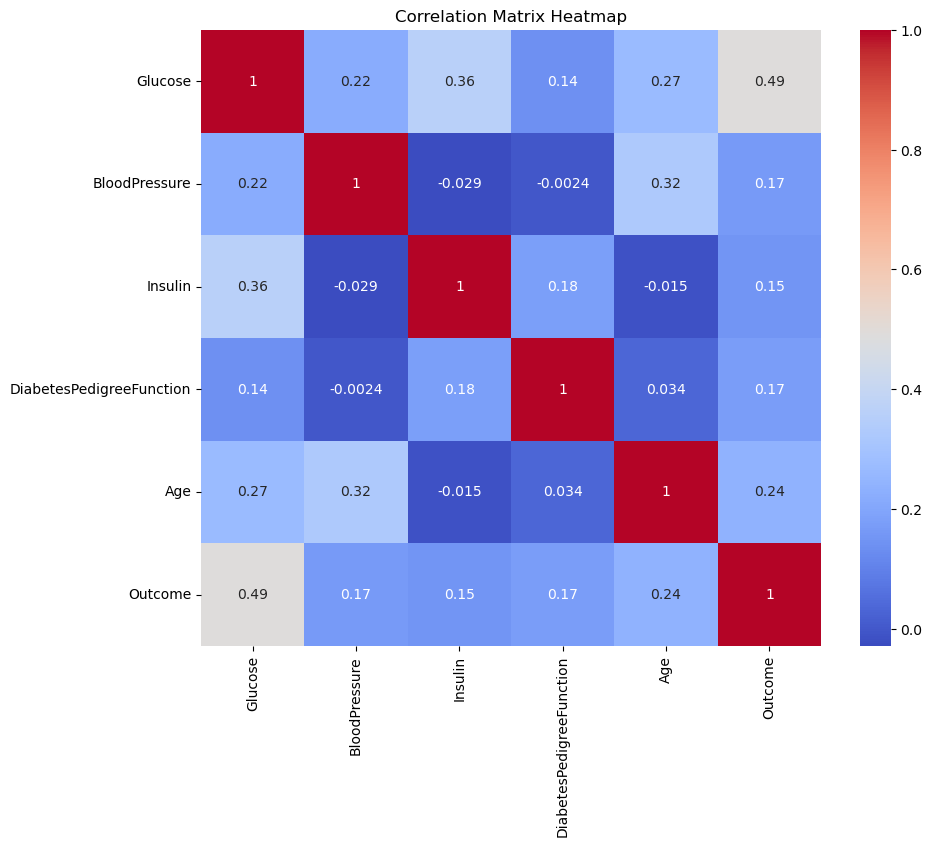

In [28]:
# 5. Plot the important features which affect diabetes using proper graphs
# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


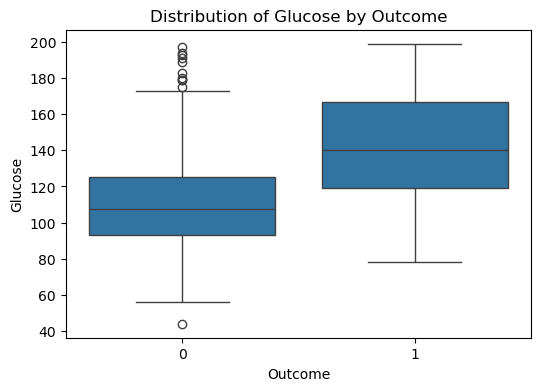

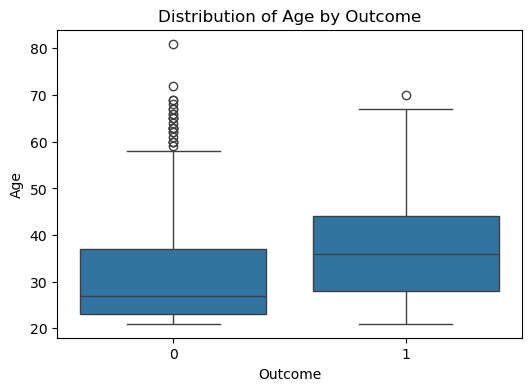

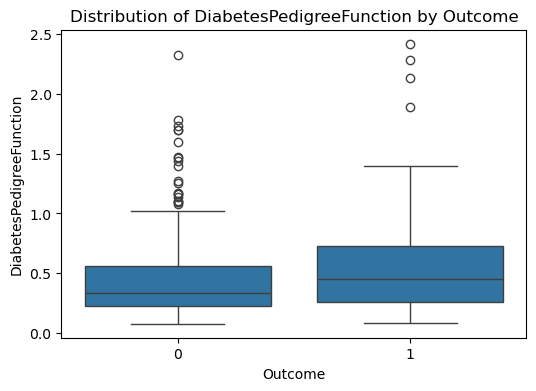

In [29]:
# Plotting distributions of features highly correlated with Outcome
highly_correlated_features = correlated_features.index[1:4]  # Selecting top 3 correlated features excluding 'Outcome'

for feature in highly_correlated_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=feature, data=data)
    plt.title(f'Distribution of {feature} by Outcome')
    plt.show()

<hr>

<h1><b>Car Evaluation Data Analysis</b></h1>
    <h2><b>Question 2</b></h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following operations on it. 
        Display the results in an appropriate format wherever required.
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>Construct a predictive model using Random Forest by choosing appropriate criteria. 
            Analyze the performance of the model with suitable evaluation measures.</b></li>
        <li><b>Display the classification report.</b></li>
    </ol>

First five rows of the dataset:
  buying maintanance doors persons lug_boot safety evaluationlevel
0  vhigh       vhigh     2       2    small    low           unacc
1  vhigh       vhigh     2       2    small    med           unacc
2  vhigh       vhigh     2       2    small   high           unacc
3  vhigh       vhigh     2       2      med    low           unacc
4  vhigh       vhigh     2       2      med    med           unacc

Summary of the dataset:
       buying maintanance doors persons lug_boot safety evaluationlevel
count    1728        1728  1728    1728     1728   1728            1728
unique      4           4     4       3        3      3               4
top     vhigh       vhigh     2       2    small    low           unacc
freq      432         432   432     576      576    576            1210

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype

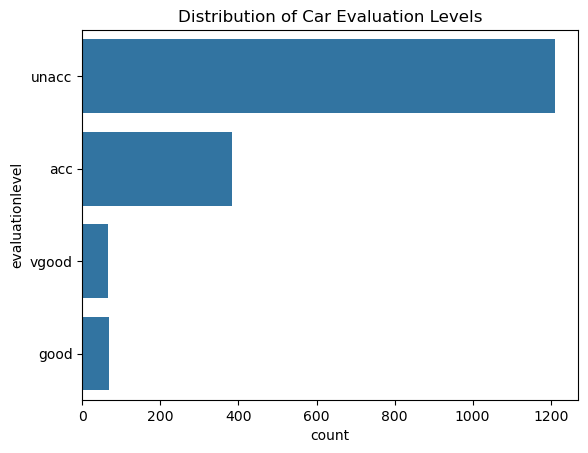

Accuracy of the model: 96.72%

Confusion Matrix:
[[109   7   1   1]
 [  2  17   0   0]
 [  4   0 354   0]
 [  2   0   0  22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       118
           1       0.71      0.89      0.79        19
           2       1.00      0.99      0.99       358
           3       0.96      0.92      0.94        24

    accuracy                           0.97       519
   macro avg       0.90      0.93      0.91       519
weighted avg       0.97      0.97      0.97       519



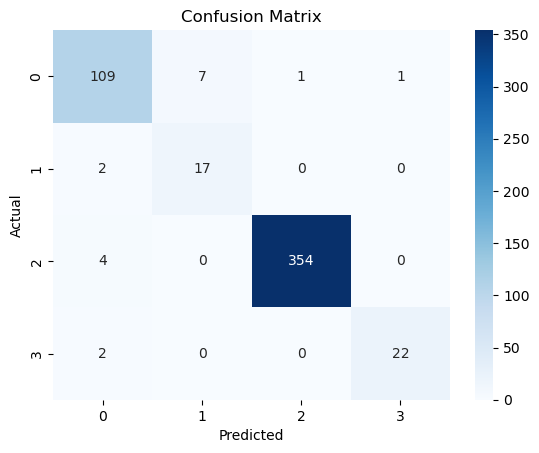

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Load the data and perform basic EDA if required
# Load the data
data = pd.read_csv('car_evaluation_dataset.csv')

# Perform basic EDA
print("First five rows of the dataset:")
print(data.head())

print("\nSummary of the dataset:")
print(data.describe(include='all'))

print("\nInformation about the dataset:")
print(data.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Data visualization
sns.countplot(data['evaluationlevel'])
plt.title('Distribution of Car Evaluation Levels')
plt.show()

# 2. Select appropriate features by performing feature engineering
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode all the categorical columns
data['buying'] = label_encoder.fit_transform(data['buying'])
data['maintanance'] = label_encoder.fit_transform(data['maintanance'])
data['doors'] = label_encoder.fit_transform(data['doors'])
data['persons'] = label_encoder.fit_transform(data['persons'])
data['lug_boot'] = label_encoder.fit_transform(data['lug_boot'])
data['safety'] = label_encoder.fit_transform(data['safety'])
data['evaluationlevel'] = label_encoder.fit_transform(data['evaluationlevel'])

# Split the data into features and target variable
X = data.drop('evaluationlevel', axis=1)
y = data['evaluationlevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Construct a predictive model using random forest by choosing appropriate criteria
clf = RandomForestClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = clf.predict(X_test)

# Analyze the performance of the model with suitable evaluation measures
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy of the model: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<hr>

<center><h1>Slip 5 </h1></center>
<hr>

<h1>HR Analytics</h1>
    <h2>Question 1</h2>
    <p>
        Refer to the given dataset and write a python script to perform the following 
        operations on it. Display the results in an appropriate format wherever 
        required. <strong>(10 marks)</strong>
    </p>
    <b>
    <ol>
        <li>Load the data and describe the dataset details.</li>
        <li>
            Check the data types and do necessary conversions. Also, check for 
            duplicates and remove them if any. Which are the different types of 
            departments? Which of them have the max and min number of 
            employees?
        </li>
        <li>
            Display the count of missing and null values and replace them if any. Find 
            out features which are not relevant and remove them.
        </li>
        <li>
            Which are the top three departments in which employees have left, and 
            what is their salary status?
        </li>
    </ol>
    </b>

In [32]:
# Load necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_excel('HR_Employee_Data.xlsx')

In [33]:
# 1. Describe the dataset details
dataset_description = data.describe(include='all')
dataset_info = data.info()

print("1. Dataset Description:")
print(dataset_description)
print("\nDataset Information:")
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB
1. Dataset Description:
          Emp_Id  satisfaction_level  last_evaluation  number_project  \
count      14999        14999.000000     14999.000000   

In [34]:
# 2. Check the data types, do necessary conversions, check for duplicates, and identify departments
# Check data types
print("\n2. Data Types:")
print(data.dtypes)

# Check for duplicates based on 'Emp_Id'
duplicates = data.duplicated(subset='Emp_Id').sum()
print("\nNumber of Duplicates: ", duplicates)

# Remove duplicates if any
if duplicates > 0:
    data = data.drop_duplicates(subset='Emp_Id')

# Identify unique departments and their counts
department_counts = data['Department'].value_counts()
max_department = department_counts.idxmax()
min_department = department_counts.idxmin()

print("\nDepartments and Their Counts:")
print(department_counts)
print("\nDepartment with Maximum Employees: ", max_department)
print("Department with Minimum Employees: ", min_department)


2. Data Types:
Emp_Id                    object
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

Number of Duplicates:  0

Departments and Their Counts:
Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

Department with Maximum Employees:  sales
Department with Minimum Employees:  management


In [35]:
# 3. Display count of missing and null values, replace them, and remove irrelevant features
# Check for missing values
missing_values = data.isnull().sum()
print("\n3. Missing Values:")
print(missing_values)

# Identify and remove non-relevant features if any (not specified, so assuming all are relevant)
# Assuming 'Emp_Id' is not relevant for analysis
data = data.drop(columns=['Emp_Id'])

print("\nAfter handling missing values and removing irrelevant features, dataset details:")
print(data.info())



3. Missing Values:
Emp_Id                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

After handling missing values and removing irrelevant features, dataset details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promot

In [36]:
# 4. Top three departments with employees who have left and their salary status
left_employees = data[data['left'] == 1]
top_departments = left_employees['Department'].value_counts().head(3)
salary_status = left_employees.groupby('Department')['salary'].value_counts().loc[top_departments.index]

print("\n4. Top 3 Departments with Employees Who Left:")
print(top_departments)
print("\nSalary Status of Employees Who Left in Top Departments:")
print(salary_status)


4. Top 3 Departments with Employees Who Left:
Department
sales        1014
technical     697
support       555
Name: count, dtype: int64

Salary Status of Employees Who Left in Top Departments:
Department  salary
sales       low       697
            medium    303
            high       14
technical   low       378
            medium    294
            high       25
support     low       389
            medium    158
            high        8
Name: count, dtype: int64


<hr>

 <h1>Airpassenger Data </h1>
    <h2>Question 2</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(12 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>
            Construct a predictive model using ARIMA. Analyze the performance of 
            the model with suitable evaluation measures.
        </b></li>
        <li><b>Display the model summary report.</b></li>
    </ol>

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


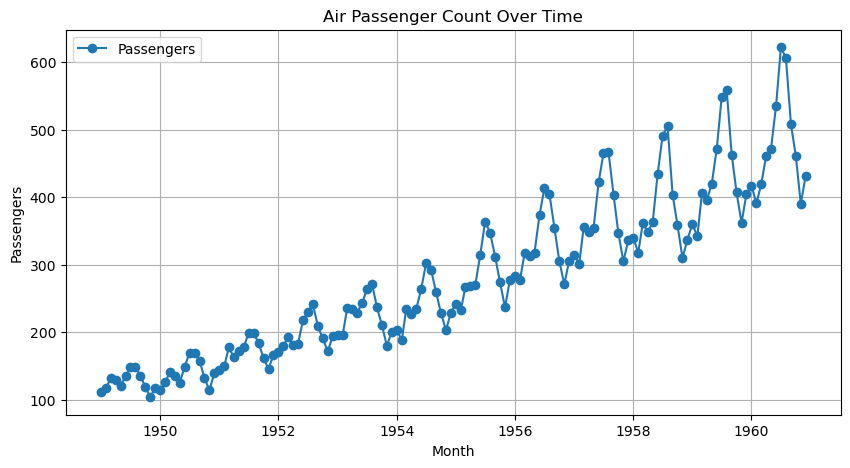

In [38]:
# 1. Load the dataset
data = pd.read_excel('airline-passengers.xlsx')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.index = pd.date_range(start=data.index[0], end=data.index[-1], freq='MS')

# Basic EDA
print(data.describe())
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Passengers'], marker='o', label='Passengers')
plt.title('Air Passenger Count Over Time')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.grid()
plt.legend()
plt.show()

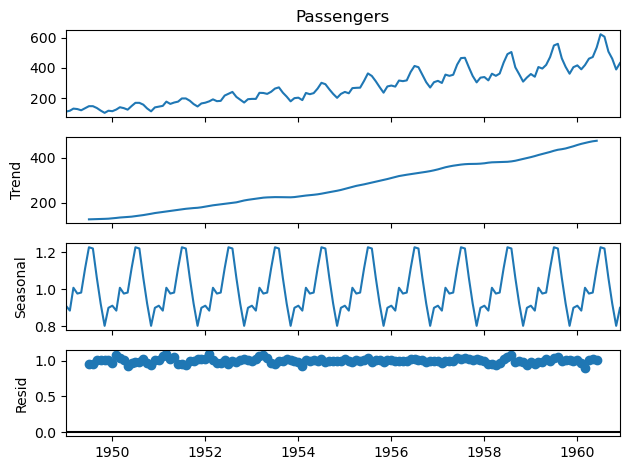

ADF Statistic: 0.8153688792060597
p-value: 0.9918802434376411
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [39]:
# 2. Feature Engineering - Check Stationarity
# Decompose the time series to observe trend and seasonality
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)
decomposition.plot()
plt.show()

# Augmented Dickey-Fuller Test
result = adfuller(data['Passengers'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# Differencing to make the series stationary if required
data_diff = data['Passengers'].diff().dropna()

Mean Absolute Error (MAE): 58.79612767984238
Root Mean Squared Error (RMSE): 76.28709841400149


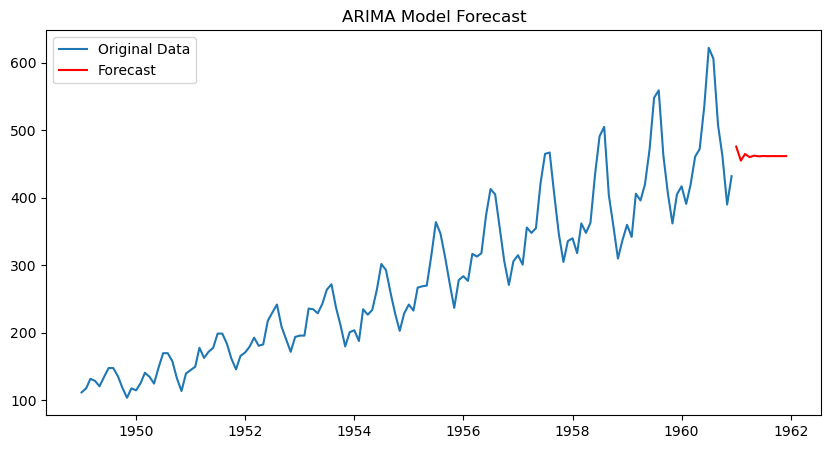

In [40]:
# 3. Construct ARIMA model
# Choose order (p, d, q) after examining ACF/PACF (manual exploration or assumption)
model = ARIMA(data['Passengers'], order=(1, 1, 1))
model_fit = model.fit()

# Predictions and Performance Evaluation
forecast = model_fit.forecast(steps=12)
actual = data['Passengers'][-12:]  # Replace with the test set if available

mae = mean_absolute_error(actual, forecast)
mse = mean_squared_error(actual, forecast)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Passengers'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()

In [41]:
# 4. Display Model Summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Tue, 19 Nov 2024   AIC                           1394.683
Time:                        14:36:22   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

<hr>

<center><h1>Slip 6 </h1></center>
<hr>

<h1>Dataset Name: Diabetes</h1>
    <h2>Question 1</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(10 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and describe the dataset details.</b></li>
        <li><b>Check the nature of data and do appropriate conversion if required.</b></li>
        <li><b>
            Display count of missing and null values and replace them if any. 
            Find out features which are not relevant and remove them.
        </b></li>
        <li><b>Which features are highly related with diabetes?</b></li>
    </ol>

<h2>Solution: Slip 4 Question 1</h2>

<hr>

 <h1>Social Ad Click</h1>
    <h2>Question 2</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(12 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>
            Construct a logistic regression model to predict whether a user will click on an ad or not. 
            Compare the performance of the model based on evaluation parameters.
        </b></li>
        <li><b>Display the model summary report.</b></li>
    </ol>

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [43]:
# 1. Load the data and perform basic EDA
data = pd.read_csv("Social_Network_Ads.csv")
print("Dataset Head:")
print(data.head())

# Drop 'User ID' as it is not useful for prediction
data = data.drop(columns=['User ID'])
print("\nDataset Info:")
print(data.info())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Encode 'Gender'
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

Dataset Head:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None

Summary Statistics:
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000

In [44]:
# 2. Select appropriate features by performing feature engineering
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
# 3. Construct logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)


Model Performance:
Accuracy: 88.75%

Confusion Matrix:
[[50  2]
 [ 7 21]]


In [46]:
# 4. Display the model summary report
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



<hr>

<center><h1>Slip 7 </h1></center>
<hr>

<h1>Hotel Booking</h1>
    <h2>Question 1</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(10 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and describe the dataset details.</b></li>
        <li><b>
            Check for missing and null values and correct them if any. Find out 
            features which are not relevant and remove them. Identify continuous 
            and categorical variables.
        </b></li>
        <li><b>Find out cancellation percentage in hotels and plot a pie chart for it.</b></li>
        <li><b>Which is the month with maximum and minimum bookings?</b></li>
    </ol>

<h2>Solution: Slip 2 Question 1</h2>

<hr>

<h1>Breast Cancer Data</h1>
    <h2>Question 2</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(12 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>
            Construct a model using Naïve Bayes for classification of tumors into 
            malignant (cancerous) or benign (non-cancerous) by choosing appropriate 
            criteria. Analyze the performance of the model with suitable evaluation 
            measures.
        </b></li>
        <li><b>Display the classification report.</b></li>
    </ol>

In [47]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset and basic EDA
data = pd.read_csv('Breast Cancer Data.csv')

# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Display basic statistics
print("\nBasic Statistics:\n", data.describe())

# Display class distribution
print("\nClass Distribution:\n", data['diagnosis'].value_counts())


Missing Values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Basic Statistics:
                  id  r

In [48]:
# Feature Engineering
# Drop the 'id' column as it is irrelevant for prediction
data = data.drop(columns=['id'])

# Encode the target variable ('diagnosis' column)
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Display the first few rows of features and target
print("\nFeatures (X):\n", X.head())
print("\nTarget (y):\n", y.head())


Features (X):
    radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst

In [49]:
# Construct Naïve Bayes Model
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [50]:
# Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

# Generate and display the classification report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<hr>

<center><h1>Slip 8 </h1></center>
<hr>

<h1>Zomato</h1>
    <h2>Question 1</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(10 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and describe the dataset details.</b></li>
        <li><b>Check the nature of data and check if conversion is required.</b></li>
        <li><b>
            Display count of missing and null values and replace them if any. Find 
            out features which are not relevant and remove them.
        </b></li>
        <li><b>Plot graphs for rating vs unique locations.</b></li>
        <li><b>Display top five most costly restaurants based on approximate cost feature.</b></li>
    </ol>

In [51]:
import pandas as pd

# Load the dataset
df = pd.read_csv('zomato.csv')

# Describe the dataset
print(df.describe(include='all'))
print(df.info())

                                                      url        address  \
count                                               51717          51717   
unique                                              51717          11495   
top     https://www.zomato.com/bangalore/jalsa-banasha...  Delivery Only   
freq                                                    1            128   
mean                                                  NaN            NaN   
std                                                   NaN            NaN   
min                                                   NaN            NaN   
25%                                                   NaN            NaN   
50%                                                   NaN            NaN   
75%                                                   NaN            NaN   
max                                                   NaN            NaN   

                   name online_order book_table   rate         votes  \
count          

In [52]:
# Display the first few rows to check the nature of the data
print(df.head())

# Check for data types
print(df.dtypes)

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

In [53]:
# Convert 'rate' to numeric by extracting numeric part and handling non-numeric values
df['rate'] = df['rate'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

# Convert 'approx_cost(for two people)' to numeric by removing commas and converting to float
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

print(df.dtypes)

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object


In [54]:
# Check for missing values
print(df.isnull().sum())

# Replace missing values if any
df.loc[df['rate'].isnull(), 'rate'] = df['rate'].mean()
df.loc[df['approx_cost(for two people)'].isnull(), 'approx_cost(for two people)'] = df['approx_cost(for two people)'].mean()

# Remove irrelevant features
df.drop(columns=['url', 'phone', 'dish_liked', 'reviews_list', 'menu_item'], inplace=True)

# Drop rows where 'location', 'rest_type', or 'cuisines' are missing, since these are likely important
df.dropna(subset=['location', 'rest_type', 'cuisines'], inplace=True)

# After cleaning, check again for any remaining missing values
print(df.isnull().sum())

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)             

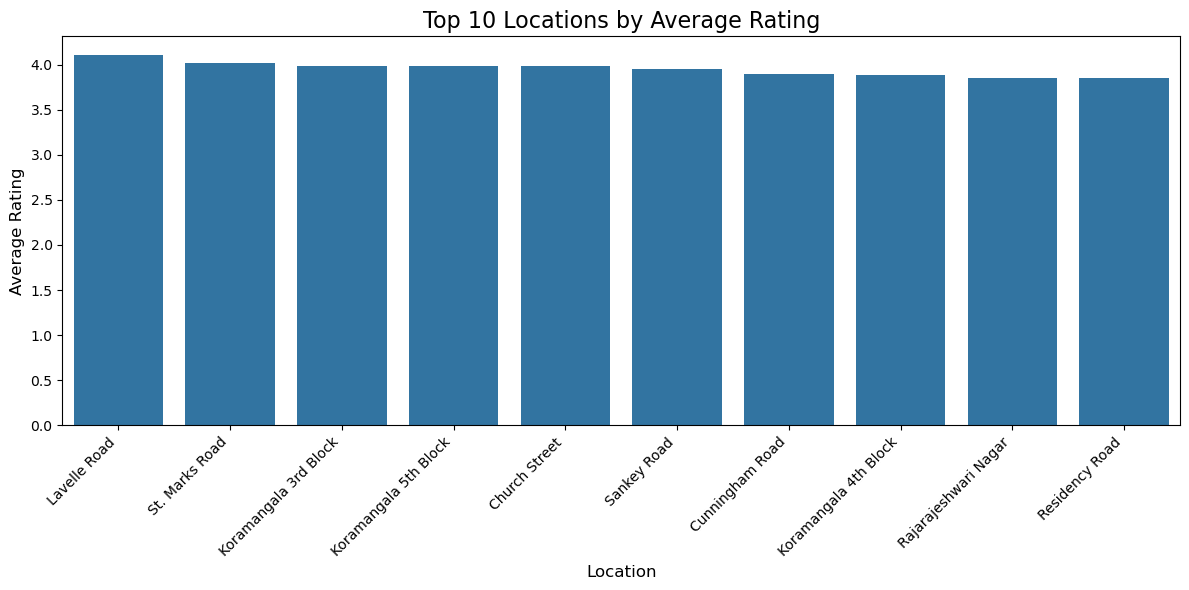

In [55]:
# Group by location and calculate the average rating for each location
location_avg_rating = df.groupby('location')['rate'].mean().sort_values(ascending=False)

# Get the top 10 locations
top_10_locations = location_avg_rating.head(10)

# Plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values)
plt.title('Top 10 Locations by Average Rating', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [56]:
# Sort the data by 'approx_cost(for two people)' in descending order and display the top 5
top_costly_restaurants = df.sort_values(by='approx_cost(for two people)', ascending=False).head(5)
print(top_costly_restaurants[['name', 'approx_cost(for two people)']])

                                         name  approx_cost(for two people)
45618  Le Cirque Signature - The Leela Palace                       6000.0
19139  Le Cirque Signature - The Leela Palace                       6000.0
40266              Royal Afghan - ITC Windsor                       5000.0
41591                  Malties - Radisson Blu                       4500.0
42141                  Malties - Radisson Blu                       4500.0


<hr>

<h1>Telecom Churn</h1>
    <h2>Question 2</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(12 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>
            Construct a model using SVM for predicting whether a customer will 
            churn or not. Analyze the performance of the model with suitable 
            evaluation measures.
        </b></li>
        <li><b>Display the classification report.</b></li>
    </ol>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [58]:
# Load the data
data = pd.read_csv('Telco-Customer-Churn.csv')  # Replace with your dataset file path

In [59]:
# Perform basic EDA
print("Basic Information:")
print(data.info())  # Show info about dataset
print("\nDescriptive Statistics:")
print(data.describe())  # Descriptive statistics for numeric columns

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())  # Check for missing values


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

In [60]:
# Feature Engineering
# Drop customerID as it is not useful for prediction
data = data.drop('customerID', axis=1)

# Convert categorical variables into dummy variables (one-hot encoding)
data = pd.get_dummies(data, drop_first=True)

# Split the data into features and target variable
X = data.drop('Churn_Yes', axis=1)  # Features (all columns except 'Churn_Yes')
y = data['Churn_Yes']  # Target variable (assuming 'Churn_Yes' is the target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling: Standardizing the feature variables (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construct the model using Support Vector Machine (SVM)
model = SVC(kernel='linear', random_state=42)  # Using linear kernel for simplicity
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


Accuracy of the SVM model: 76.67%

Confusion Matrix:
[[1272  267]
 [ 226  348]]

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.83      0.84      1539
        True       0.57      0.61      0.59       574

    accuracy                           0.77      2113
   macro avg       0.71      0.72      0.71      2113
weighted avg       0.77      0.77      0.77      2113



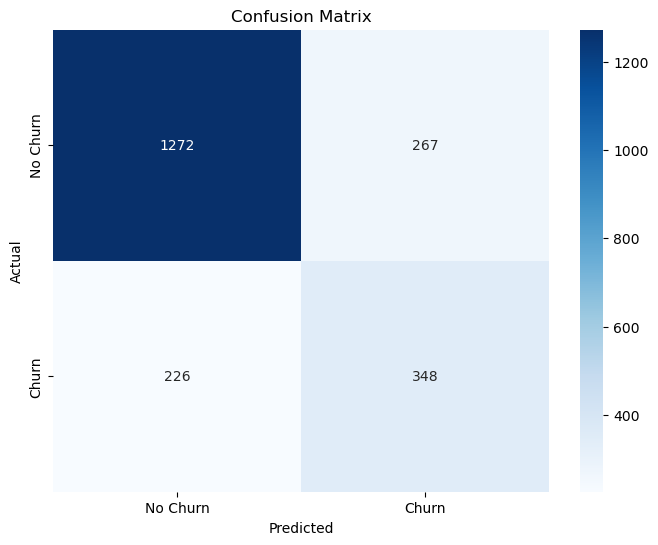

In [61]:
# Analyze the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy of the SVM model: {:.2f}%".format(accuracy * 100))
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<hr>

<center><h1>Slip 9 </h1></center>
<hr>

 <h1>Hotel Booking</h1>
    <h2>Question 1</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(10 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and describe the dataset details.</b></li>
        <li><b>
            Check for missing and null values and correct them if any. Find out 
            features which are not relevant and remove them. Identify continuous 
            and categorical variables.
        </b></li>
        <li><b>Find out cancellation percentage in hotels and plot a pie chart for it.</b></li>
        <li><b>Which is the month with maximum and minimum bookings?</b></li>
    </ol>

<h2>Solution: Slip 2 Question 1</h2>

<hr>

 <h1>Covid-19</h1>
    <h2>Question 2</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(12 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>
            Construct a predictive model using ARIMA. Analyze the 
            performance of the model with suitable evaluation measures.
        </b></li>
        <li><b>Display the model summary report.</b></li>
    </ol>

<hr>

<center><h1>Slip 10 </h1></center>
<hr>

<h1>Heart Disease</h1>
    <h2>Question 1</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(10 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and describe the dataset details.</b></li>
        <li><b>Check the nature of data and do appropriate conversion if required.</b></li>
        <li><b>
            Display count of missing and null values and replace them if any. 
            Find out features which are not relevant and remove them.
        </b></li>
        <li><b>Which features are highly related with heart disease?</b></li>
        <li><b>What is the relation between GenHealth and HeartDisease?</b></li>
    </ol>

<h2>Solution: Slip 3 Question 1</h2>

<hr>

<h1>Car Evaluation Data</h1>
    <h2>Question 2</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(12 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>
            Construct a predictive model using a decision tree to predict the car's 
            acceptability by choosing appropriate criteria. Analyze the performance 
            of the model with suitable evaluation measures.
        </b></li>
        <li><b>Display the classification report.</b></li>
    </ol>

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the data
data = pd.read_csv('car_evaluation_dataset.csv')

# Perform basic EDA
print("First five rows of the dataset:")
print(data.head())

print("\nSummary of the dataset:")
print(data.describe(include='all'))

print("\nInformation about the dataset:")
print(data.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

First five rows of the dataset:
  buying maintanance doors persons lug_boot safety evaluationlevel
0  vhigh       vhigh     2       2    small    low           unacc
1  vhigh       vhigh     2       2    small    med           unacc
2  vhigh       vhigh     2       2    small   high           unacc
3  vhigh       vhigh     2       2      med    low           unacc
4  vhigh       vhigh     2       2      med    med           unacc

Summary of the dataset:
       buying maintanance doors persons lug_boot safety evaluationlevel
count    1728        1728  1728    1728     1728   1728            1728
unique      4           4     4       3        3      3               4
top     vhigh       vhigh     2       2    small    low           unacc
freq      432         432   432     576      576    576            1210

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype

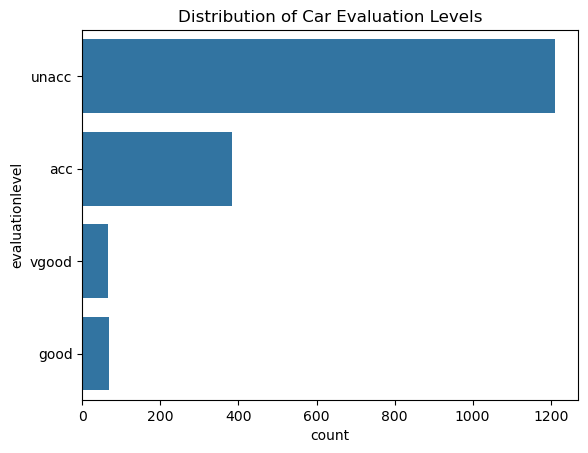

In [63]:
# Data visualization
sns.countplot(data['evaluationlevel'])
plt.title('Distribution of Car Evaluation Levels')
plt.show()

In [64]:
# Feature engineering: Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode all the categorical columns
data['buying'] = label_encoder.fit_transform(data['buying'])
data['maintanance'] = label_encoder.fit_transform(data['maintanance'])
data['doors'] = label_encoder.fit_transform(data['doors'])
data['persons'] = label_encoder.fit_transform(data['persons'])
data['lug_boot'] = label_encoder.fit_transform(data['lug_boot'])
data['safety'] = label_encoder.fit_transform(data['safety'])
data['evaluationlevel'] = label_encoder.fit_transform(data['evaluationlevel'])

In [65]:
# Split the data into features and target variable
X = data.drop('evaluationlevel', axis=1)
y = data['evaluationlevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construct a decision tree model
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = clf.predict(X_test)


In [66]:
# Analyze the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy of the model: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy of the model: 96.72%

Confusion Matrix:
[[110   6   2   0]
 [  1  18   0   0]
 [  5   0 353   0]
 [  3   0   0  21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       118
           1       0.75      0.95      0.84        19
           2       0.99      0.99      0.99       358
           3       1.00      0.88      0.93        24

    accuracy                           0.97       519
   macro avg       0.92      0.94      0.92       519
weighted avg       0.97      0.97      0.97       519



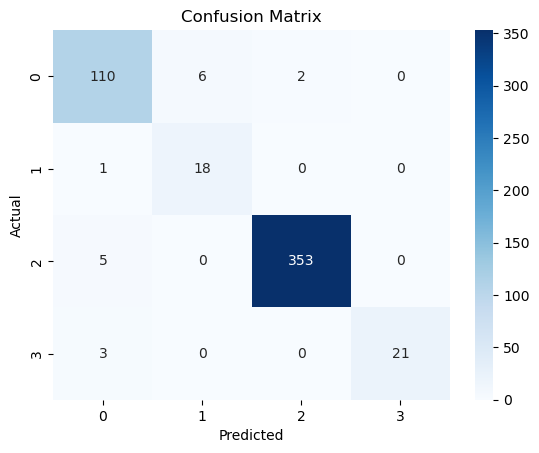

In [67]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<hr>

<center><h1>Slip 11 </h1></center>
<hr>

<h1>Amazon Dataset (credits.csv & titles.csv)</h1>
    <h2>Question 1</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(10 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and describe the dataset details.</b></li>
        <li><b>Check the nature of data and check if scaling is required.</b></li>
        <li><b>Plot top countries having higher content.</b></li>
        <li><b>Tabulate the data based on popular shows and imdb_score.</b></li>
    </ol>

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data and describe the dataset details
titles = pd.read_csv('titles.csv')
credits = pd.read_csv('credits.csv')

print("Titles Dataset Description:")
print(titles.describe(include='all'))
print("\nCredits Dataset Description:")
print(credits.describe(include='all'))

Titles Dataset Description:
             id      title   type         description  release_year  \
count      9871       9871   9871                9752   9871.000000   
unique     9868       9737      2                9734           NaN   
top     tm66674  King Lear  MOVIE  No overview found.           NaN   
freq          2          3   8514                   5           NaN   
mean        NaN        NaN    NaN                 NaN   2001.327221   
std         NaN        NaN    NaN                 NaN     25.810071   
min         NaN        NaN    NaN                 NaN   1912.000000   
25%         NaN        NaN    NaN                 NaN   1995.500000   
50%         NaN        NaN    NaN                 NaN   2014.000000   
75%         NaN        NaN    NaN                 NaN   2018.000000   
max         NaN        NaN    NaN                 NaN   2022.000000   

       age_certification      runtime     genres production_countries  \
count               3384  9871.000000       98


Titles Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtyp

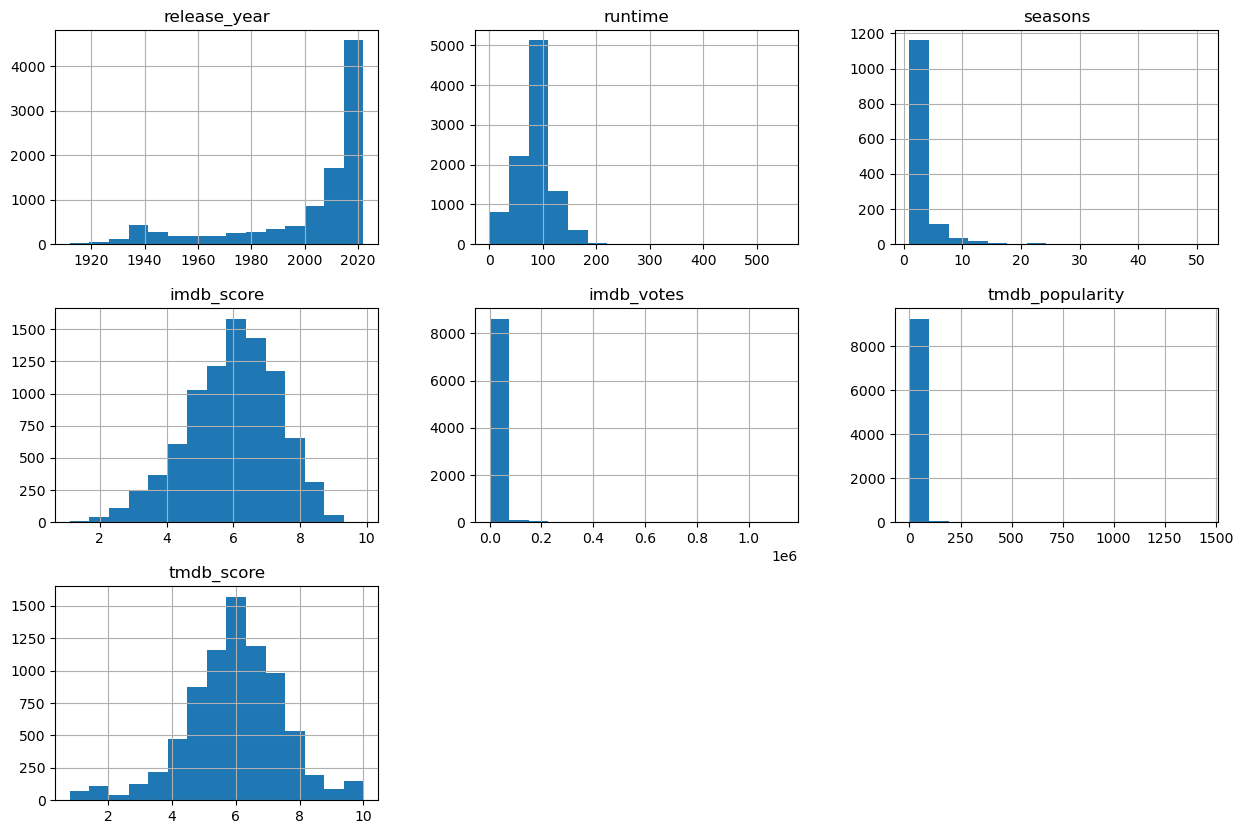

In [69]:
# 2. Check the nature of data and check if scaling is required
print("\nTitles Dataset Info:")
print(titles.info())
print("\nCredits Dataset Info:")
print(credits.info())

# Scaling check
numerical_columns = titles.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Columns:")
print(numerical_columns)

# Plotting histograms to check the distribution
titles[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.show()

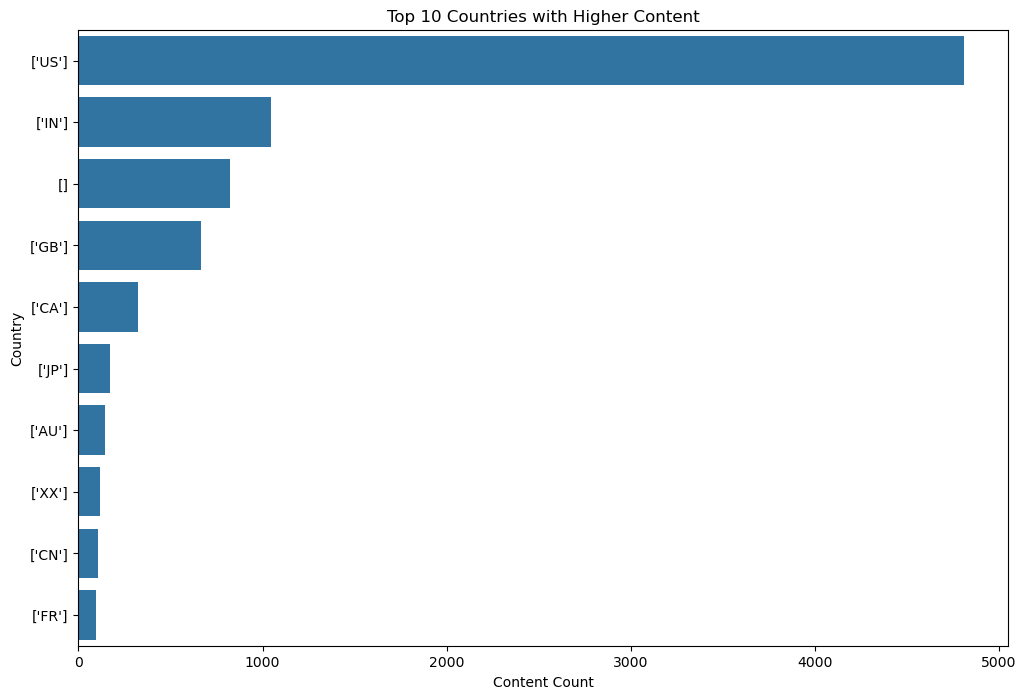

In [70]:
# 3. Plot top countries having higher content using seaborn
country_content = titles['production_countries'].explode().value_counts().reset_index()
country_content.columns = ['Country', 'Count']
top_countries = country_content.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, x='Count', y='Country')
plt.title('Top 10 Countries with Higher Content')
plt.xlabel('Content Count')
plt.ylabel('Country')
plt.show()

In [71]:
# 4. Tabulate the data based on popular shows and imdb_score
popular_shows = titles[['title', 'imdb_score', 'tmdb_popularity']].sort_values(by='imdb_score', ascending=False).head(10)

print("\nTop 10 Popular Shows Based on IMDb Score:")
print(popular_shows.to_string(index=False))


Top 10 Popular Shows Based on IMDb Score:
                        title  imdb_score  tmdb_popularity
                   Pawankhind         9.9            3.812
    Water Helps the Blood Run         9.7              NaN
            Couple of Mirrors         9.5            5.116
                   The Chosen         9.4           30.771
                   Tari Sathe         9.4            0.821
        Subaru Launch Control         9.3            0.600
            Pazhagiya Naatkal         9.3              NaN
                     Jai Bhim         9.3            6.051
Surgeons: At the Edge of Life         9.2            1.519
              Soorarai Pottru         9.2            4.146


<hr>

<h1>Social Ad Click Data</h1>
    <h2>Question 2</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(12 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>
            Construct a predictive model using logistic regression to predict whether 
            a user will click on an Ad based on some features. Analyze the performance 
            of the model with suitable evaluation measures.
        </b></li>
        <li><b>Display the classification report.</b></li>
    </ol>

<h2>Solution: Slip 6 Question 2</h2>

<hr>

<center><h1>Slip 12 </h1></center>
<hr>

<h1><b>Hotel Booking Data Analysis</b></h1>
    <h2><b>Question 1</b></h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following operations on it. 
        Display the results in an appropriate format wherever required.
    </p>
    <ol>
        <li><b>Load the data and describe the dataset details.</b></li>
        <li><b>Check for missing and null values and correct them if any. Find out features which are not relevant and remove them. Identify continuous and categorical variables.</b></li>
        <li><b>Find out cancellation percentage in hotels and plot a pie chart for it.</b></li>
        <li><b>Which is the month with maximum and minimum bookings?</b></li>
    </ol>

<h2>Solution: Slip 2 Question 1</h2>

<hr>

<h1>Telecom Churn Data</h1>
    <h2>Question 2</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(12 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>
            Construct a predictive model using logistic regression to predict whether 
            a customer will churn or not. Analyze the performance of the model with 
            suitable evaluation measures.
        </b></li>
        <li><b>Display the classification report.</b></li>
    </ol>

Basic EDA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

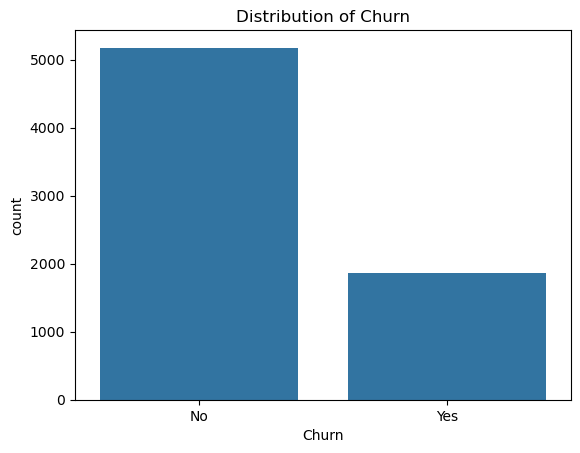

Confusion Matrix:
[[1516   23]
 [ 505   69]]
Accuracy Score:
0.7501183151916706
Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.99      0.85      1539
        True       0.75      0.12      0.21       574

    accuracy                           0.75      2113
   macro avg       0.75      0.55      0.53      2113
weighted avg       0.75      0.75      0.68      2113



In [74]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv('Telco-Customer-Churn.csv')

# Perform basic EDA
print("Basic EDA:")
print(data.info())
print(data.describe())
print(data.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()

# Feature Engineering
# Convert categorical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Split the data into features (X) and target (y)
X = data_encoded.drop('Churn_Yes', axis=1)  # Assuming 'Churn_Yes' is the target column after one-hot encoding
y = data_encoded['Churn_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construct a predictive model using logistic regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the performance of the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

<hr>

<center><h1>Slip 13 </h1></center>
<hr>

<h1>HR Analytics</h1>
    <h2>Question 1</h2>
    <p>
        Refer to the given dataset and write a python script to perform the following 
        operations on it. Display the results in an appropriate format wherever 
        required. <strong>(10 marks)</strong>
    </p>
    <b>
    <ol>
        <li>Load the data and describe the dataset details.</li>
        <li>
            Check the data types and do necessary conversions. Also, check for 
            duplicates and remove them if any. Which are the different types of 
            departments? Which of them have the max and min number of 
            employees?
        </li>
        <li>
            Display the count of missing and null values and replace them if any. Find 
            out features which are not relevant and remove them.
        </li>
        <li>
            Which are the top three departments in which employees have left, and 
            what is their salary status?
        </li>
    </ol>
    </b>

<h2>Solution: Slip 5 Question 1</h2>

<hr>

<h1><b>Car Evaluation Data Analysis</b></h1>
    <h2><b>Question 2</b></h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following operations on it. 
        Display the results in an appropriate format wherever required.
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>Construct a predictive model using Random Forest by choosing appropriate criteria. 
            Analyze the performance of the model with suitable evaluation measures.</b></li>
        <li><b>Display the classification report.</b></li>
    </ol>

<h2>Solution: Slip 4 Question 2</h2>

<hr>

<center><h1>Slip 14 </h1></center>
<hr>

<h1><b>Diabetes Data Analysis</b></h1>
    <h2><b>Question 1</b></h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following operations on it. 
        Display the results in an appropriate format wherever required.
    </p>
    <ol>
        <li><b>Load the data and describe the dataset details.</b></li>
        <li><b>Check the nature of data and do appropriate conversion if required.</b></li>
        <li><b>Display count of missing and null values and replace them if any. 
            Find out features which are not relevant and remove them.</b></li>
        <li><b>Which features are highly related with diabetes?</b></li>
        <li><b>Plot the important features which affect diabetes using proper graphs.</b></li>
    </ol>

<h2>Solution: Slip 4 Question 1</h2>

<hr>

 <h1>Covid-19</h1>
    <h2>Question 2</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(12 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>
            Construct a predictive model using ARIMA. Analyze the 
            performance of the model with suitable evaluation measures.
        </b></li>
        <li><b>Display the model summary report.</b></li>
    </ol>

<h2>Solution: Slip 9 Question 2</h2>

<hr>

<center><h1>Slip 15</h1></center>
<hr>

<h1><b>Heart Disease Data Analysis</b></h1>
    <h2><b>Question 1</b></h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following operations on it. 
        Display the results in an appropriate format wherever required.
    </p>
    <ol>
        <li><b>Load the data and describe the dataset details.</b></li>
        <li><b>Check the nature of data and do appropriate conversion if required.</b></li>
        <li><b>Display count of missing and null values and replace them if any. Find out features which are not relevant and remove them.</b></li>
        <li><b>Which features are highly related with heart disease?</b></li>
        <li><b>What is the relation between GenHealth and HeartDisease?</b></li>
    </ol>

<h2>Solution: Slip 3 Question 1</h2>

<hr>

<h1>Diabetes Data</h1>
    <h2>Question 2</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(12 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>
            Construct a predictive model using Naïve Bayes for classification of 
            tumors into malignant (cancerous) or benign (non-cancerous) by choosing 
            appropriate criteria. Analyze the performance of the model with suitable 
            evaluation measures.
        </b></li>
        <li><b>Display the classification report.</b></li>
    </ol>

   Glucose  BloodPressure  Insulin  DiabetesPedigreeFunction  Age  Outcome
0      148             72        0                     0.627   50        1
1       85             66        0                     0.351   31        0
2      183             64        0                     0.672   32        1
3       89             66       94                     0.167   21        0
4      137             40      168                     2.288   33        1
          Glucose  BloodPressure     Insulin  DiabetesPedigreeFunction  \
count  768.000000     768.000000  768.000000                768.000000   
mean   120.894531      69.105469   79.799479                  0.471876   
std     31.972618      19.355807  115.244002                  0.331329   
min      0.000000       0.000000    0.000000                  0.078000   
25%     99.000000      62.000000    0.000000                  0.243750   
50%    117.000000      72.000000   30.500000                  0.372500   
75%    140.250000      80.000000

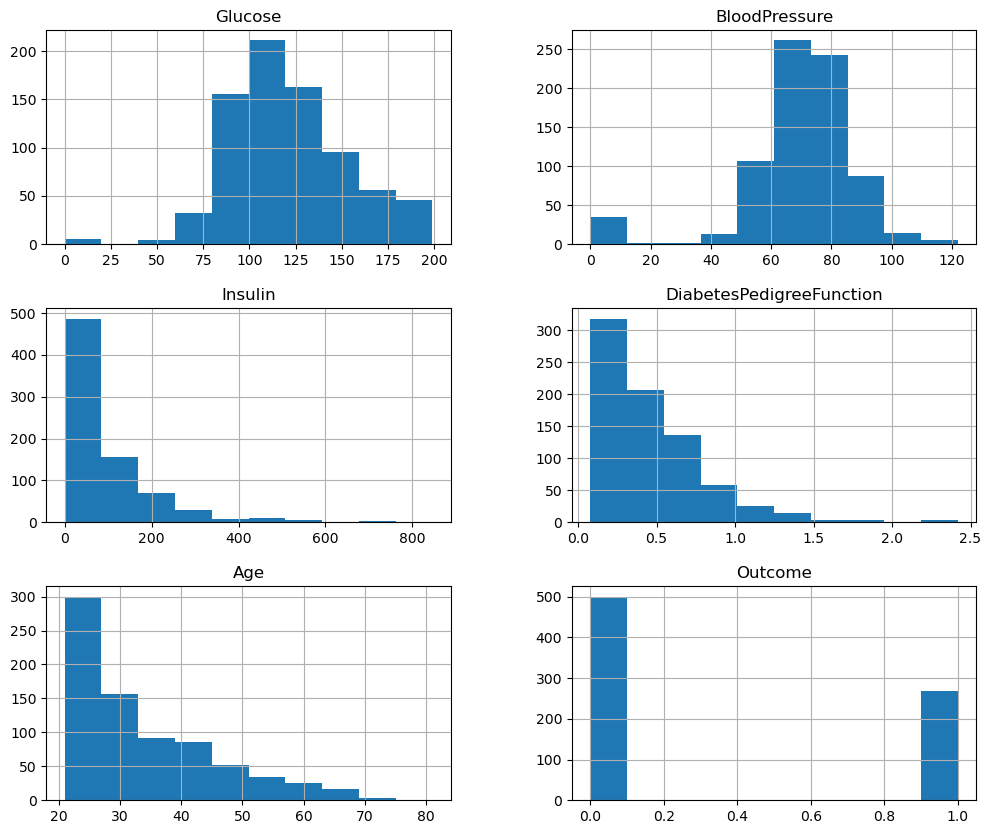

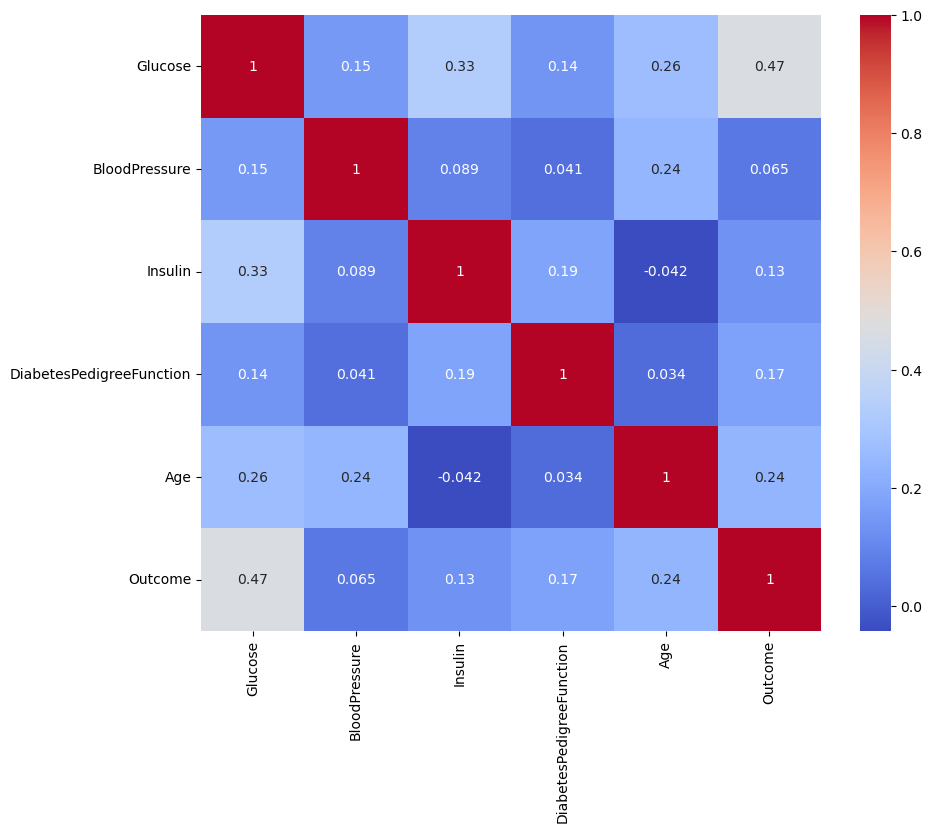

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.65      0.54      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



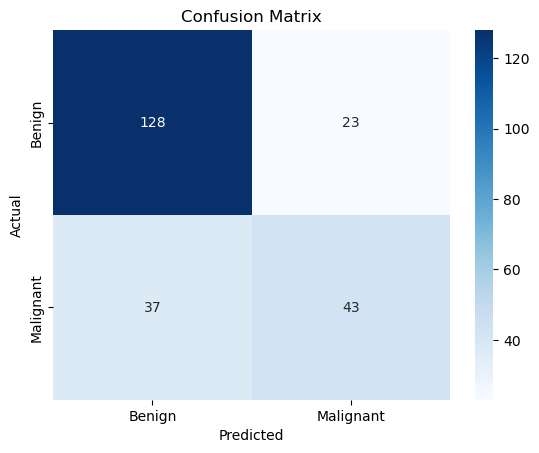

In [77]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 2: Load the dataset
# Assuming the dataset is in CSV format, replace 'diabetes_data.csv' with the correct file path
data = pd.read_csv('diabetes.csv')

# Step 3: Perform basic EDA (Exploratory Data Analysis)
print(data.head())  # First 5 rows
print(data.describe())  # Summary statistics
print(data.info())  # Data types and non-null values
print(data.isnull().sum())  # Check for missing values

# Step 4: Data visualization (for basic EDA)
# Histograms for each feature
data.hist(figsize=(12, 10))
plt.show()

# Correlation matrix heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Step 5: Feature engineering
# Drop irrelevant columns or handle missing values (if any)
# For example, we can drop columns like 'ID' if it's present and not necessary for prediction
# Assuming 'ID' column exists:
# data = data.drop(columns=['ID'])

# If there are any missing values, we can either fill them or drop rows/columns
data = data.fillna(data.mean())  # Fill missing values with column means

# Step 6: Selecting features and target
# Assuming the target variable is 'Outcome' (1 = diabetic, 0 = non-diabetic)
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Build the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 9: Predict on the test set
y_pred = model.predict(X_test)

# Step 10: Analyze the performance of the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Step 11: Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: You can plot the confusion matrix as well for better insight
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<hr>

<center><h1>Slip 16</h1></center>
<hr>

<h1><b>Diabetes Data Analysis</b></h1>
    <h2><b>Question 1</b></h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following operations on it. 
        Display the results in an appropriate format wherever required.
    </p>
    <ol>
        <li><b>Load the data and describe the dataset details.</b></li>
        <li><b>Check the nature of data and do appropriate conversion if required.</b></li>
        <li><b>Display count of missing and null values and replace them if any. 
            Find out features which are not relevant and remove them.</b></li>
        <li><b>Which features are highly related with diabetes?</b></li>
        <li><b>Plot the important features which affect diabetes using proper graphs.</b></li>
    </ol>

<h2>Solution: Slip 4 Question 1</h2>

<hr>

<h1>Car Evaluation Data</h1>
    <h2>Question 2</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(12 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>
            Construct a predictive model using a decision tree to predict the car's 
            acceptability by choosing appropriate criteria. Analyze the performance 
            of the model with suitable evaluation measures.
        </b></li>
        <li><b>Display the classification report.</b></li>
    </ol>

<h2>Solution: Slip 10 Question 2</h2>

<hr>

<center><h1>Slip 17</h1></center>
<hr>

<h1><b>Amazon Dataset Analysis (credits.csv & titles.csv)</b></h1>
    <h2><b>Question 1</b></h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following operations on it. 
        Display the results in an appropriate format wherever required.
    </p>
    <ol>
        <li><b>Load the data and describe the dataset details.</b></li>
        <li><b>Check the nature of data and determine if scaling is required.</b></li>
        <li><b>Check for missing values and show the percentage of missing values for each attribute. 
            Handle the missing values based on percentage. Which attributes are not useful? Remove them.</b></li>
    </ol>



<h2>Solution: Slip 1 Question 1</h2>

<hr>

<h1>Breast Cancer Data</h1>
    <h2>Question 2</h2>
    <p>
        Refer to the given dataset and write a Python script to perform the following 
        operations on it. Display the results in an appropriate format wherever required. 
        <strong>(12 marks)</strong>
    </p>
    <ol>
        <li><b>Load the data and perform basic EDA if required.</b></li>
        <li><b>Select appropriate features by performing feature engineering.</b></li>
        <li><b>
            Construct a predictive model using logistic regression for classification 
            of tumors into malignant (cancerous) or benign (non-cancerous) by 
            choosing appropriate criteria. Analyze the performance of the model with 
            suitable evaluation measures.
        </b></li>
        <li><b>Display the classification report.</b></li>
    </ol>

Dataset Overview:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimet

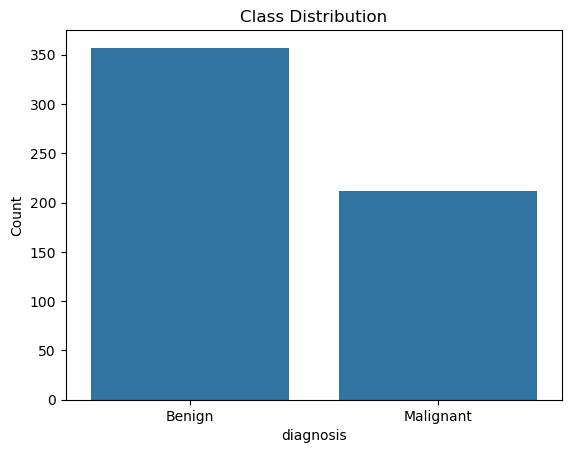

Model Accuracy: 96.49%

Confusion Matrix:
[[71  1]
 [ 3 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



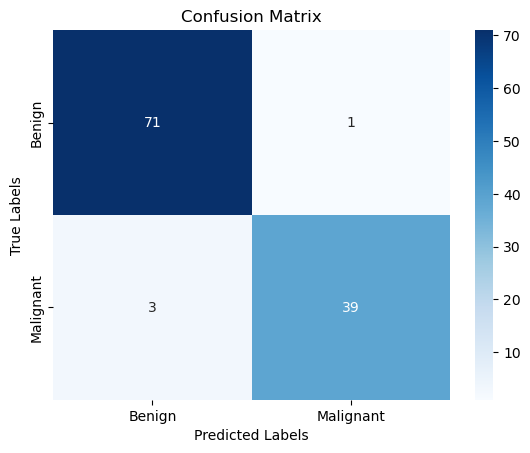

In [81]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Load the dataset
# Replace 'file_path' with the actual path to the dataset
file_path = 'Breast Cancer Data.csv'
data = pd.read_csv(file_path)

# Step 2: Perform basic EDA
print("Dataset Overview:")
print(data.head())  # Display first 5 rows
print("\nDataset Info:")
print(data.info())  # Display data types and non-null values
print("\nDataset Summary Statistics:")
print(data.describe())  # Display summary statistics

# Step 3: Drop irrelevant columns and encode the target variable
# 'id' is not relevant for prediction and will be dropped
data_cleaned = data.drop(columns=['id'])

# Encode 'diagnosis' column: Malignant (M) -> 1, Benign (B) -> 0
data_cleaned['diagnosis'] = LabelEncoder().fit_transform(data_cleaned['diagnosis'])

# Step 4: Visualize the distribution of target classes
sns.countplot(x=data_cleaned['diagnosis'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.ylabel('Count')
plt.show()

# Step 5: Split dataset into features and target
X = data_cleaned.drop(columns=['diagnosis'])  # Features
y = data_cleaned['diagnosis']  # Target variable

# Step 6: Scale the features
# StandardScaler scales data to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split data into training and testing sets
# 80% training data, 20% testing data, stratify ensures balanced splits
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Step 8: Train a Logistic Regression model
model = LogisticRegression(random_state=42)  # Initialize model
model.fit(X_train, y_train)  # Fit model to training data

# Step 9: Make predictions on test data
y_pred = model.predict(X_test)

# Step 10: Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Display evaluation results
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Step 11: Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
